# Identitas
- Nama : Andi Nirina Nursiana Zasqia
- ID : SI602019

# Latar Belakang
Stroke adalah kondisi medis yang serius yang terjadi ketika aliran darah ke otak terganggu, menyebabkan kerusakan pada sel-sel otak dan bisa menyebabkan cacat permanen bahkan hingga kematian. Dengan adanya Prediksi risiko stroke merupakan tantangan yang penting dalam upaya pencegahan dini dan intervensi yang tepat.


# Problem Statement
proyek ini bertujuan untuk membangun model prediksi risiko stroke berdasarkan berbagai faktor seperti demografis, kondisi kesehatan, dan gaya hidup.

# Objective
Membangun model prediksi risiko stroke untuk membantu dalam identifikasi individu yang berisiko tinggi dan memungkinkan pencegahan dini.

# Data Understanding
**Sumber Data**: 
Dataset ini berasal dari Datasets kaggle yang menyediakan berbagai informasi mulai dari atribut hingga status kesehatan dan masih banyak lagi.

**Atribut dalam Dataset:**
* id 
* Jenis Kelamin: Jenis kelamin individu (Laki-laki/Perempuan).
* Umur: Usia individu.
* Hipertensi: Status hipertensi individu (0: Tidak, 1: Ya).
* Penyakit Jantung: Status penyakit jantung individu (0: Tidak, 1: Ya).
* Status Menikah: Status pernikahan individu (0: Belum Menikah, 1: Menikah).
* Jenis Pekerjaan : private, self employed.
* Tipe Tempat Tinggal : Perkotaan, Pedesaan.
* Tingkat Glukosa: Tingkat glukosa dalam darah individu.
* BMI: Indeks Massa Tubuh individu.
* Perokok: Status perokok individu (0: Tidak, 1: Ya).
* Stroke: Variabel target yang menunjukkan apakah individu mengalami stroke (0: Tidak, 1: Ya).


# Key Question
Apakah seseorang yang terkena hipertensi berpeluang terkena stroke lebih tinggi dibandingkan dengan orang yang tidak terkena hipertensi?

# Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas
print(pandas.__version__)

2.2.2


# Data Loading

In [20]:
df= pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [21]:
df.shape

(5110, 12)

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [24]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bisa kita lihat bahwa pada BMI nya memiliki missing sebanyak 201

In [25]:
(df.isnull().sum()/df.shape[0]) * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

bisa dilihat pada data diatas ternyata terdapat missing value di kolom "BMI" sebanyak 201 atau 3.93 persen dari keseluruhan baris.

# EDA

EDA mengacu pada proses yang dilakukan untuk menemukan pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi dengan bantuan statistik dan representasi grafis. Pada tahapan ini kita akan mencoba melakukan:
- Analisis Statistika untuk memahami pola dari data dan menjawab pertanyaan berkaitan dengan stroke.
- Analisis skema missing values ataupun data anomali
- Pengecekan Korelasi Data

In [26]:
categorical_feature= df.columns[df.dtypes=='object'].tolist()
print(categorical_feature)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [27]:
numerical_feature= df.select_dtypes(include='number').columns.tolist()
print(numerical_feature)

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [28]:
numerical_feature = ['age','avg_glucose_level', 'bmi']

In [29]:
cat_enc_feature= ['hypertension', 'heart_disease']
target= ['stroke']

In [30]:
df[numerical_feature].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


- Usia (age): Rata-rata usia responden adalah sekitar 43 tahun dengan rentang antara 0.08 hingga 82 tahun.
- Rata-rata Kadar Glukosa dalam Darah (avg_glucose_level): Rata-rata kadar glukosa dalam darah adalah sekitar 106 mg/dL, dengan variasi yang signifikan (standar deviasi sekitar 45.28) dari nilai minimum hingga maksimum.
- Indeks Massa Tubuh (BMI): Rata-rata BMI responden adalah sekitar 28.89, dengan variasi yang cukup signifikan (standar deviasi sekitar 7.85). Terdapat 4909 entri yang memiliki nilai BMI, sedangkan 201 entri memiliki nilai yang hilang.

In [31]:
df[categorical_feature].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


- Gender: Terdapat 3 kategori gender yang teridentifikasi dalam data, dengan mayoritas responden (sekitar 2994 dari 5110) adalah perempuan.
- Ever Married: Sebagian besar responden (sekitar 3353 dari 5110) telah menikah.
- Jenis Pekerjaan (Work Type): Mayoritas responden (sekitar 2925 dari 5110) bekerja di sektor swasta (Private).
- Tipe Tempat Tinggal (Residence Type): Mayoritas responden (sekitar 2596 dari 5110) tinggal di daerah perkotaan (Urban).
- Status Merokok (Smoking Status): Mayoritas responden (sekitar 1892 dari 5110) tidak pernah merokok.

# Pengecekan Distribusi Data Kategorikal

In [32]:
stroke_dist=df['stroke'].value_counts(normalize=True)
stroke_dist.values

array([0.95127202, 0.04872798])

In [33]:
stroke_dist.keys()

Index([0, 1], dtype='int64', name='stroke')

In [34]:
!pip -q install --upgrade nbformat

In [35]:
#pie chart
fig = px.pie(df, values=stroke_dist.values, names=stroke_dist.keys(), title='Population of European continent')
fig.show()

Ternyata berdasarkan hasil dari data diatas menunjukkan bahwa 95.1% orang normal sedangkan yang stroke ada 4.87%

In [36]:
hypertension_dist=df[cat_enc_feature[0]].value_counts(normalize=True)
hypertension_dist

hypertension
0    0.902544
1    0.097456
Name: proportion, dtype: float64

In [37]:
hd_dist=df[cat_enc_feature[1]].value_counts(normalize=True)
hd_dist

heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64

**Apakah Orang yang terkena hypertensi berpeluang lebih besar terkena stroke dibandingkan dengan yang normal?**

In [38]:
df.groupby(['hypertension','stroke']).size().unstack()

stroke,0,1
hypertension,,
0,4429,183
1,432,66


In [39]:
pd.crosstab(df['hypertension'], df['stroke'], normalize='index')

stroke,0,1
hypertension,,
0,0.960321,0.039679
1,0.867470,0.132530


Dari tabel tersebut, kita dapat mengambil beberapa kesimpulan:

- Untuk yang tidak menderita hipertensi (hypertension = 0), sebagian besar (sekitar 96.03%) tidak mengalami stroke, sedangkan sebagian kecil (sekitar 3.97%) mengalami stroke.

- Untuk  yang menderita hipertensi (hypertension = 1), mayoritas (sekitar 86.75%) juga tidak mengalami stroke, tetapi proporsi yang mengalami stroke (sekitar 13.25%) lebih tinggi dibandingkan dengan individu yang tidak menderita hipertensi.

Ini menunjukkan bahwa hipertensi meningkatkan risiko stroke, meskipun mayoritas individu dengan atau tanpa hipertensi tidak mengalami stroke.








In [40]:
pd.crosstab(df['heart_disease'], df['stroke'], normalize='index')

stroke,0,1
heart_disease,,
0,0.958213,0.041787
1,0.829710,0.170290


Jadi, dari tabel tersebut, ternyata:

- yang tidak memiliki penyakit jantung (heart_disease = 0), sebagian besar (sekitar 95.82%) tidak mengalami stroke, sedangkan sebagian kecil (sekitar 4.18%) mengalami stroke.

- yang memiliki penyakit jantung (heart_disease = 1), masih mayoritas (sekitar 82.97%) tidak mengalami stroke, tetapi proporsi yang mengalami stroke (sekitar 17.03%) lebih tinggi dibandingkan dengan individu yang tidak memiliki penyakit jantung.

Jadi, dapat dilihat bahwa memiliki penyakit jantung meningkatkan risiko stroke, meskipun mayoritas individu dengan atau tanpa penyakit jantung tidak mengalami stroke.

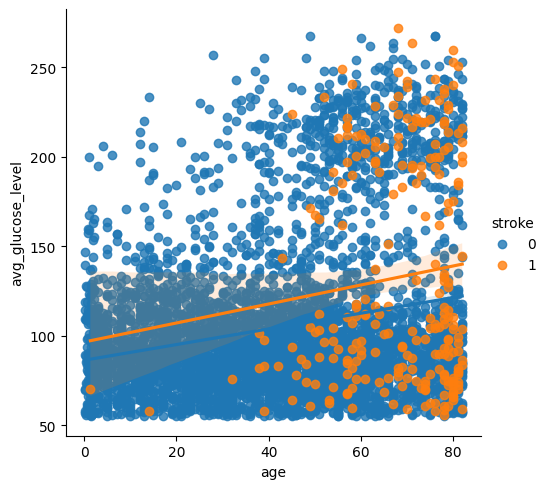

In [41]:
sns.lmplot(df, x='age',y='avg_glucose_level', hue='stroke');

kita dapat menilihat bahwa pasien yang stroke umumnya berusia diatas 40.

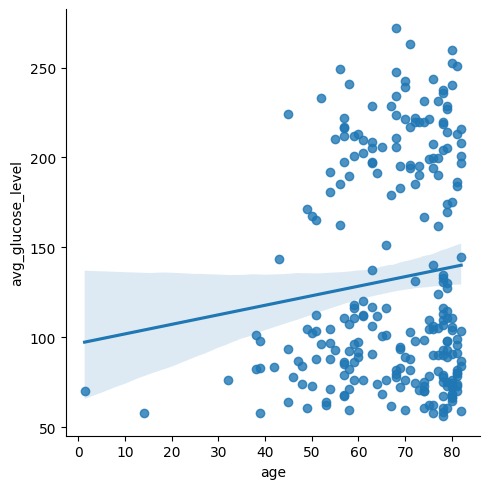

In [42]:
sns.lmplot(df.query('stroke==1'), x='age',y='avg_glucose_level');

In [43]:
df.query('stroke==1')[['age']].describe()

,age
count,249.000000
mean,67.728193
std,12.727419
min,1.320000
25%,59.000000
50%,71.000000
75%,78.000000
max,82.000000


ternyata sebagian besar org yg terkena stroke itu dari umur 59 sampai 71

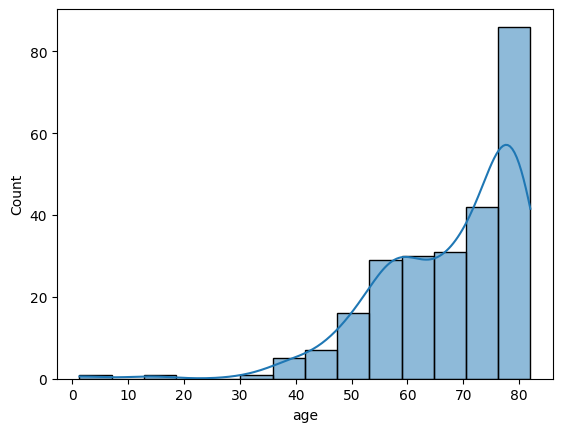

In [44]:
sns.histplot(df.query('stroke==1'), x='age',kde=True);

semakin tua umur seseorang potensi untuk terkena stroke itu lebih tinggi 

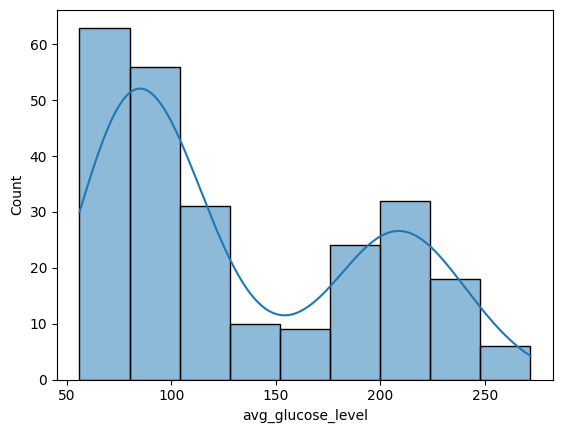

In [45]:
sns.histplot(df.query('stroke==1'), x='avg_glucose_level',kde=True);

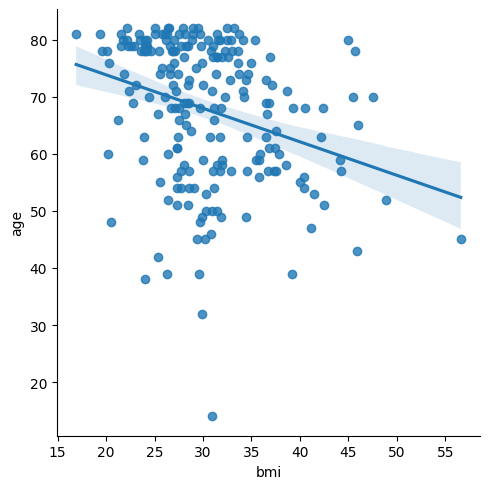

In [46]:
sns.lmplot(df.query('stroke==1'), x='bmi',y='age');

In [47]:
# Create a column for "bmi_categories"
df['bmi_categories'] = pd.cut(df['bmi'], 
                              bins=[0, 18.4, 24.9, 39.9, np.inf], 
                              labels=['Underweight', 'Normal weight', 
                                      'Overweight', 'Obese'])

In [48]:
def percetage_data(df=None, column=None,sort=True):
    value_counts = df[column].value_counts(sort=sort)
    df_percentage = pd.DataFrame({'count': value_counts, 
                                  'percentage': round(value_counts *100 / len(df),2) 
                                 })

    return df_percentage

percetage_data(df,'bmi_categories')

,count,percentage
bmi_categories,,
Overweight,2915,57.05
Normal weight,1243,24.32
Obese,414,8.10
Underweight,337,6.59


* Overweight: Ada 2915 entri dalam dataset yang dikategorikan sebagai Overweight. Persentase entri Overweight terhadap total jumlah entri dalam kolom 'bmi_categories' adalah sekitar 57.05%.
* Normal weight: Terdapat 1243 entri dalam dataset yang dikategorikan sebagai Normal weight. Persentase entri Normal weight terhadap total jumlah entri dalam kolom 'bmi_categories' adalah sekitar 24.32%.
* Obese: Terdapat 414 entri dalam dataset yang dikategorikan sebagai Obese. Persentase entri Obese terhadap total jumlah entri dalam kolom 'bmi_categories' adalah sekitar 8.10%.
* Underweight: Terdapat 337 entri dalam dataset yang dikategorikan sebagai Underweight. Persentase entri Underweight terhadap total jumlah entri dalam kolom 'bmi_categories' adalah sekitar 6.59%.

In [49]:
pd.crosstab(df['bmi_categories'], df['stroke'], normalize='index')

stroke,0,1
bmi_categories,,
Underweight,0.997033,0.002967
Normal weight,0.971842,0.028158
Overweight,0.947170,0.052830
Obese,0.954106,0.045894


In [50]:
df.query('stroke==1 and age<=20')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_categories
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1,NaN
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1,Overweight


In [51]:
other= df[(df['gender']=='Other')]
df.drop(other.index, inplace=True)

In [52]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [53]:
display(df.smoking_status.unique())
display(df.smoking_status.value_counts())

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [54]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [55]:
display(df.work_type.value_counts())

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

# Data Preprocessing

In [56]:
X= df.drop(['id','stroke','bmi_categories'], axis=1)
y= df['stroke']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,Male,79.0,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked
3927,Female,62.0,0,0,Yes,Private,Urban,88.32,36.3,Unknown
2337,Female,21.0,0,0,No,Private,Rural,59.52,33.7,never smoked
3910,Male,31.0,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked
1886,Female,31.0,0,0,No,Private,Rural,59.63,19.9,never smoked


In [58]:
X_train.shape

(4087, 10)

In [59]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [60]:
categorical_feature

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [61]:
cat_bin_feature= ['gender']
cat_nom_feature= ['smoking_status','ever_married','work_type','Residence_type']
num_feature= ['age','avg_glucose_level', 'bmi']
cat_enc_feature= ['hypertension', 'heart_disease']

In [62]:
cat_gender= [['Female','Male']]


# cat_ord_transformer= Pipeline(steps=[
#     ('ordinal_enc1', OrdinalEncoder(categories=cat_gender), ['gender']),
# ])


numeric_transformer= Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
     ('scaler', MinMaxScaler()),

])
# Pipeline untuk fitur kategorikal yang belum di encode, contoh misalkan dengan ordinal
categorical_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder()),
])

# Gabungkan keempat pipeline tersebut
preprocessor= ColumnTransformer(
    transformers=[
        ('ordinal_enc1', OrdinalEncoder(categories=cat_gender), cat_bin_feature),
        ('num', numeric_transformer, num_feature),
        ('enc_nominal', categorical_transformer, cat_nom_feature),
        ('enc_cat_nominal', SimpleImputer(strategy='most_frequent'), cat_enc_feature),
    ],
    remainder='passthrough',
    verbose=True
)

In [63]:
X_train.shape

(4087, 10)

In [64]:
X_train_new= preprocessor.fit_transform(X_train)
X_test_new= preprocessor.transform(X_test)

[ColumnTransformer] .. (1 of 4) Processing ordinal_enc1, total=   0.0s
[ColumnTransformer] ........... (2 of 4) Processing num, total=   0.1s
[ColumnTransformer] ... (3 of 4) Processing enc_nominal, total=   0.0s
[ColumnTransformer]  (4 of 4) Processing enc_cat_nominal, total=   0.0s


In [65]:
X_train_new

array([[1.        , 0.96337891, 0.26553412, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75585938, 0.15326378, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.25537109, 0.02031207, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01318359, 0.19462653, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.46289062, 0.17916167, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.56054688, 0.20787554, ..., 0.        , 0.        ,
        0.        ]])

In [66]:
X_train_new.shape

(4087, 19)

In [67]:
encoded_columns = preprocessor.named_transformers_['enc_nominal'].\
                  get_feature_names_out(cat_nom_feature)

encoded_columns

array(['smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban'], dtype=object)

In [68]:
columns= (cat_bin_feature + list(num_feature) + list(encoded_columns) + cat_enc_feature)

X_train_new = pd.DataFrame(X_train_new,columns=columns)
X_test_new = pd.DataFrame(X_test_new,columns=columns)

In [69]:
X_train_new.head()

,gender,age,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,hypertension,heart_disease
0,1.0,0.963379,0.265534,0.208477,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.755859,0.153264,0.297824,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.255371,0.020312,0.268041,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.377441,0.048841,0.230241,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.377441,0.020820,0.109966,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [70]:
!pip -q install imblearn

ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn


In [71]:
# Oversampling with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
# smote = SMOTE(sampling_strategy={1:1000}, k_neighbors=5, random_state=42)     # Minority Class will have 1000 data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_new, y_train)
y_train_balanced.value_counts()

stroke
0    3900
1    3900
Name: count, dtype: int64

# Model Development

In [72]:
model_dt= DecisionTreeClassifier(random_state=3)
model_dt.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=3)

In [73]:
y_pred_train= model_dt.predict(X_train_balanced)
y_pred_test= model_dt.predict(X_test_new)
y_pred_test

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
# Classification Report
print("Classification Repor data test:")
print(classification_report(y_train_balanced, y_pred_train))

Classification Repor data test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       1.00      1.00      1.00      3900

    accuracy                           1.00      7800
   macro avg       1.00      1.00      1.00      7800
weighted avg       1.00      1.00      1.00      7800



In [75]:
# Classification Report
print("Classification Repor data test:")
print(classification_report(y_test, y_pred_test))

Classification Repor data test:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       960
           1       0.11      0.23      0.15        62

    accuracy                           0.84      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.90      0.84      0.87      1022



In [76]:
from sklearn.model_selection import GridSearchCV

grid_search_params = {
    'max_depth': [3,4,5,6,7,8,9],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2,3,4]
}

grid_search_params

{'max_depth': [3, 4, 5, 6, 7, 8, 9],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [2, 3, 4]}

# Random Forrest Clasifier

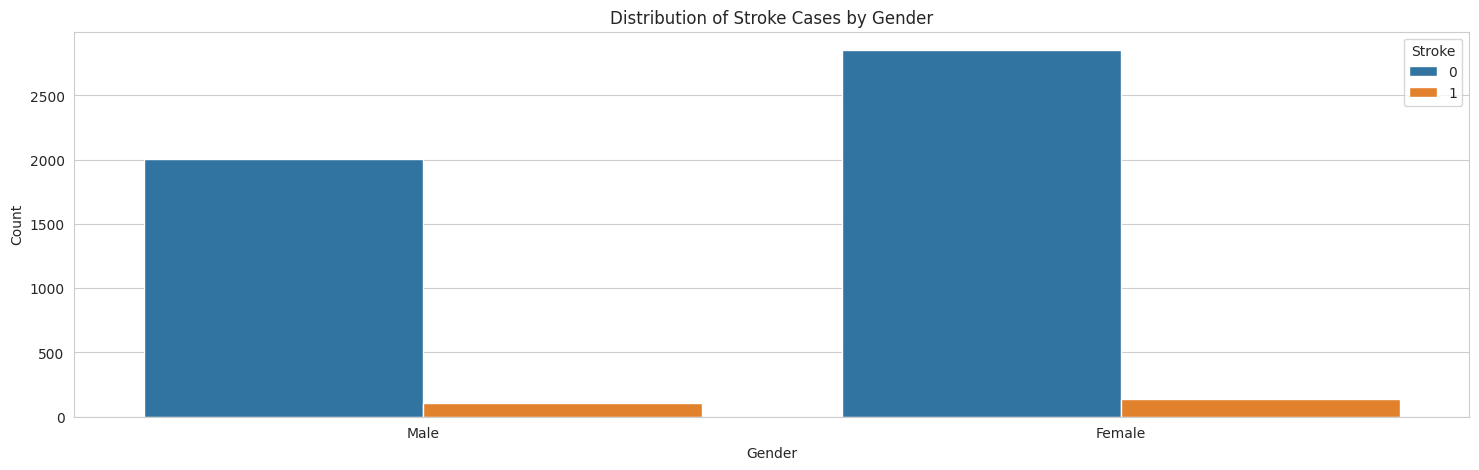

In [77]:
# Set style
sns.set_style("whitegrid")

# Visualization 1: Distribution of Stroke Cases by Gender
plt.figure(figsize=(18, 5))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Distribution of Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()

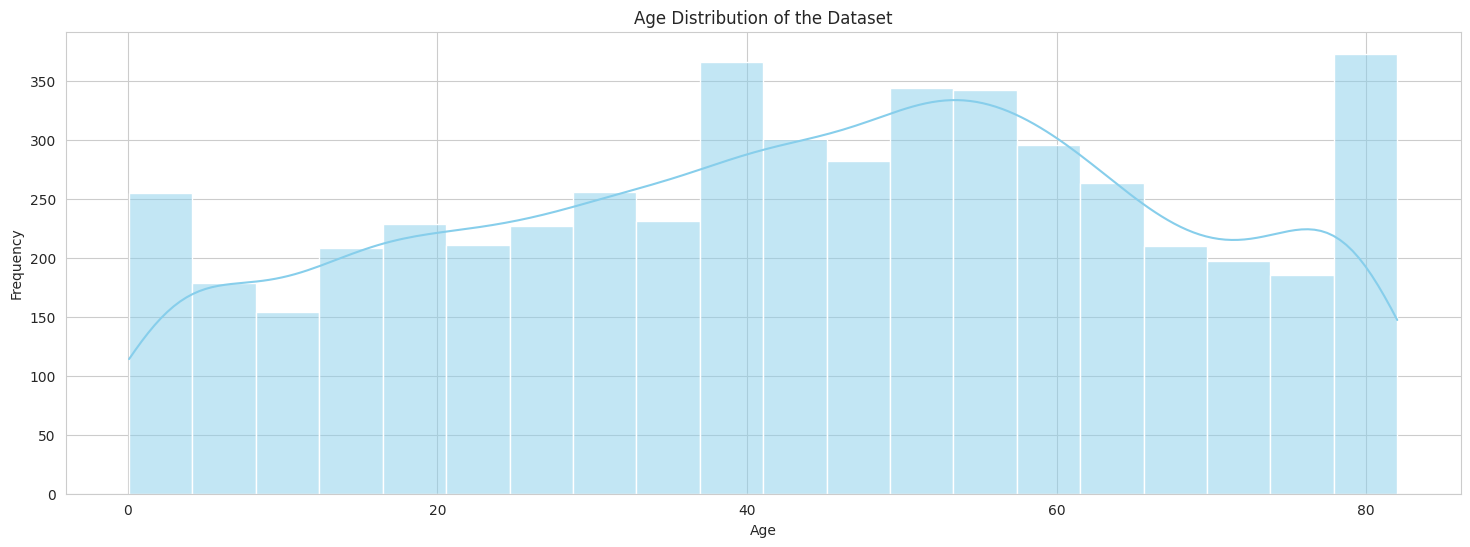

In [78]:
# Visualization 2: Age Distribution of the Dataset
plt.figure(figsize=(18, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

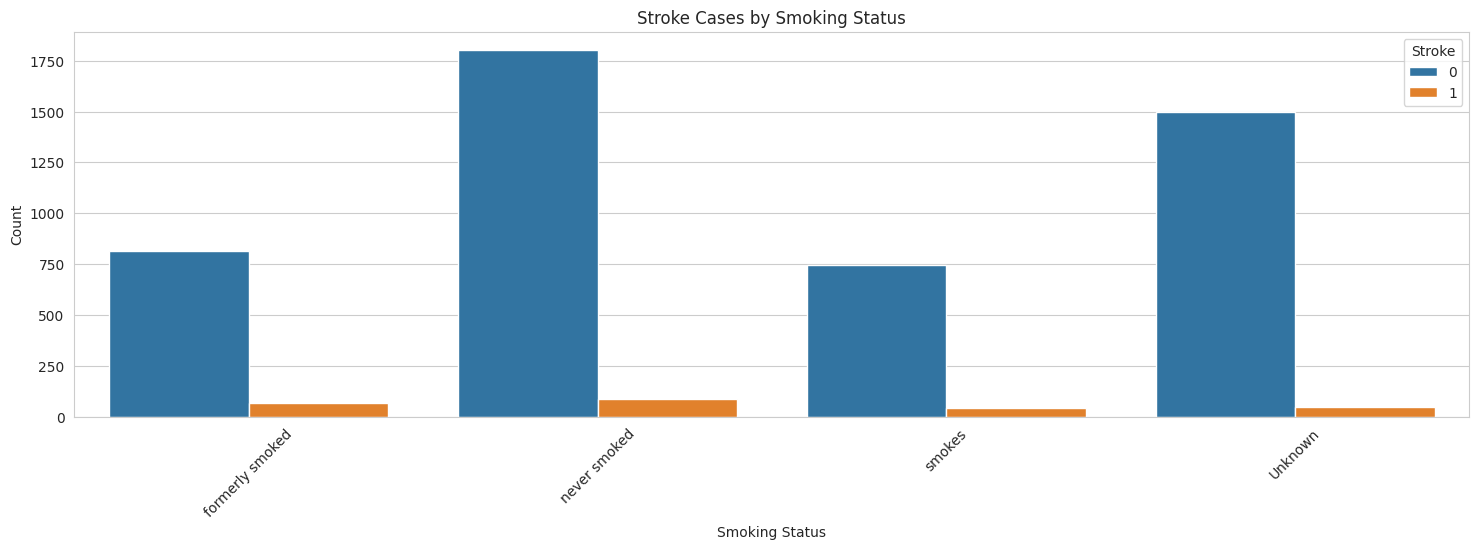

In [79]:
# Visualization 3: Stroke Cases by Smoking Status
plt.figure(figsize=(18, 5))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke Cases by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)
plt.show()

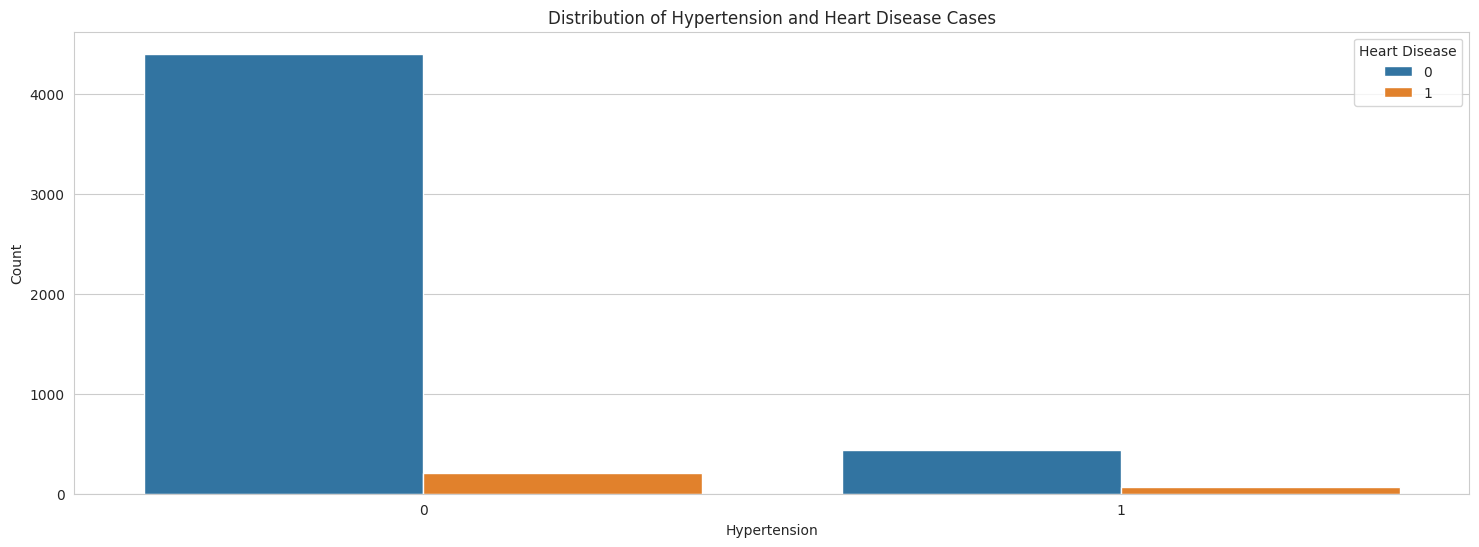

In [80]:
# Visualization 4: Distribution of Hypertension and Heart Disease Cases
plt.figure(figsize=(18, 6))
sns.countplot(x='hypertension', hue='heart_disease', data=df)
plt.title('Distribution of Hypertension and Heart Disease Cases')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

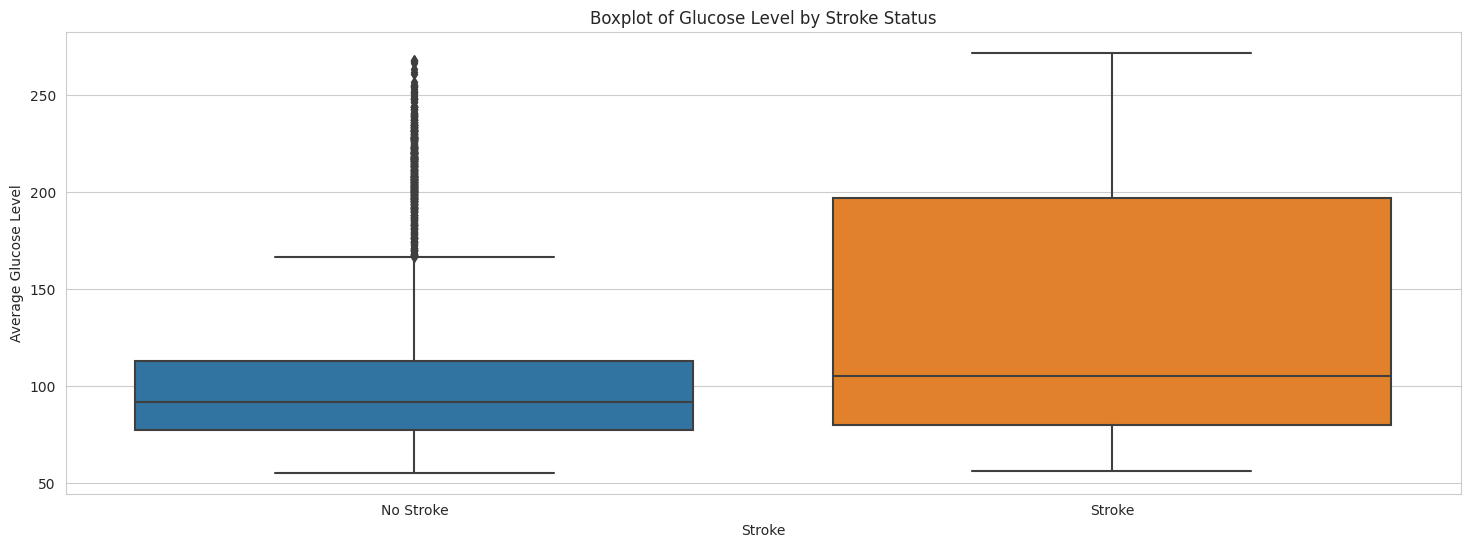

In [81]:
# Visualization 5: Boxplot of Glucose Level by Stroke Status
plt.figure(figsize=(18, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Boxplot of Glucose Level by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

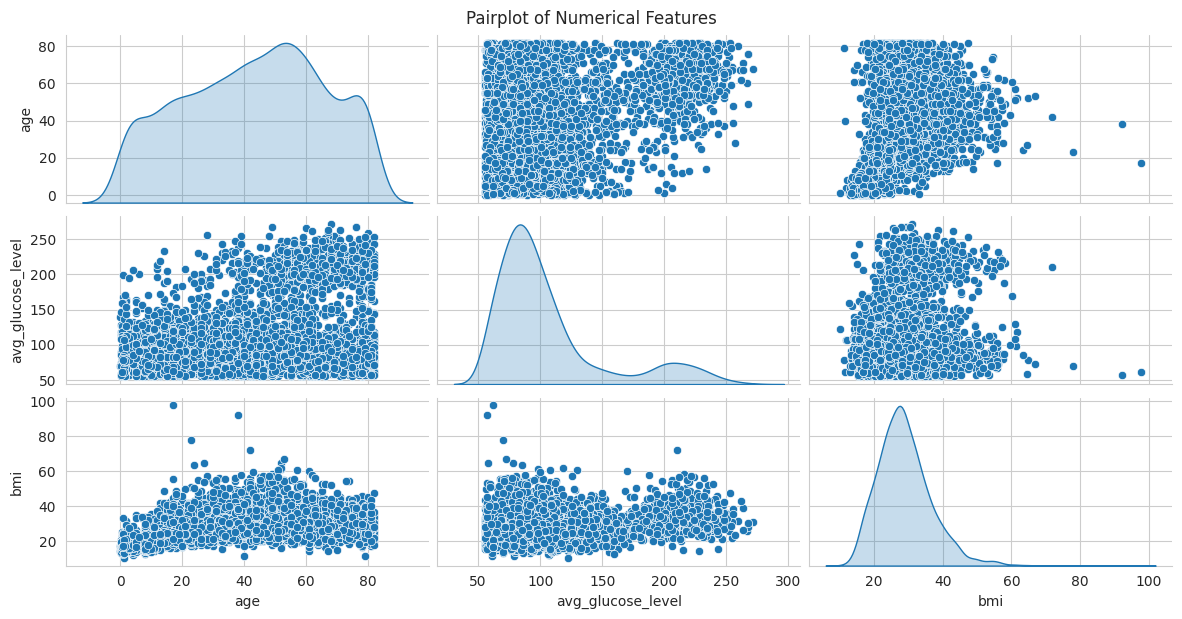

In [82]:
# Visualization 6: Pairplot of Numerical Features
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi']], diag_kind='kde', height=2, aspect=2)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

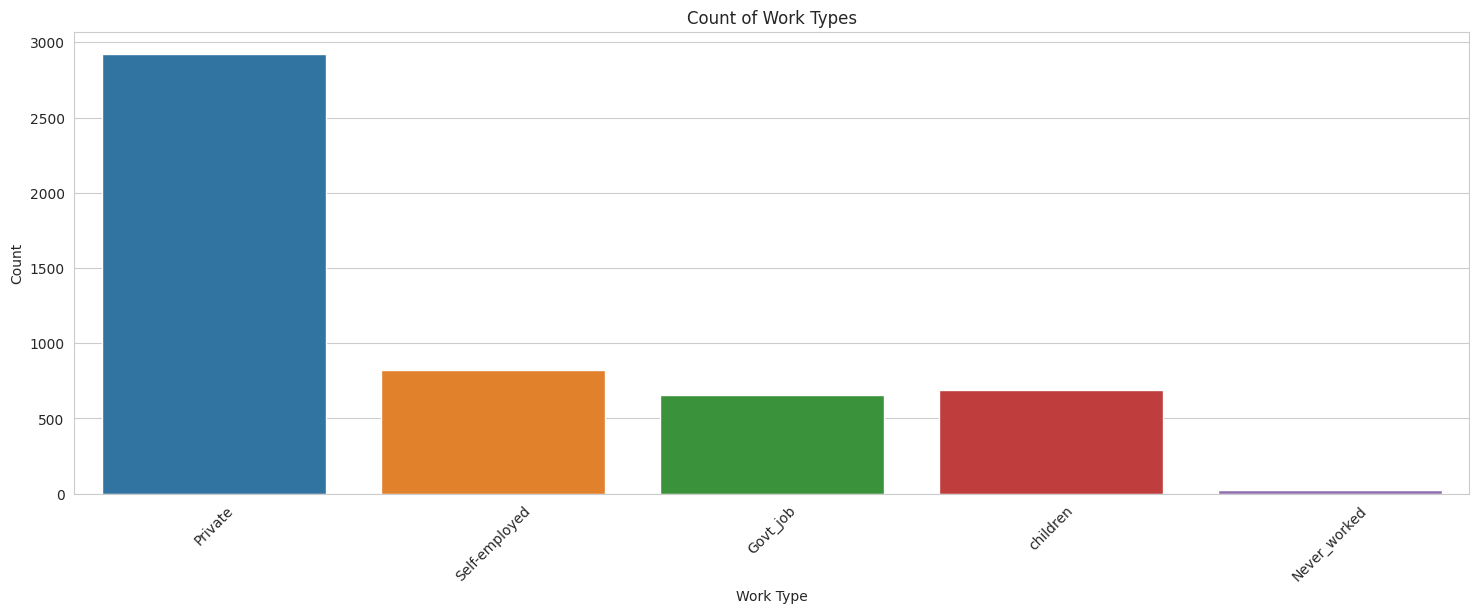

In [83]:
# Visualization 7: Count of Work Types
plt.figure(figsize=(18, 6))
sns.countplot(x='work_type', data=df)
plt.title('Count of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Handling missing values in 'bmi' column using mean imputation

In [84]:

df['bmi'].fillna(df['bmi'].mean(), inplace=True)




# Display the preprocessed data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_categories
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,Overweight
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,Overweight
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,Overweight
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,Normal weight


In [85]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-100'])

# Create BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])

# Aggregate smoking status
df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 1, 'Unknown': np.nan})

# Drop original 'age' and 'bmi' columns
df.drop(['age', 'bmi'], axis=1, inplace=True)

# Display the data after feature engineering
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_categories,age_group,bmi_category
0,9046,Male,0,1,Yes,Private,Urban,228.69,1.0,1,Overweight,66-100,Obese II
1,51676,Female,0,0,Yes,Self-employed,Rural,202.21,0.0,1,NaN,51-65,Overweight
2,31112,Male,0,1,Yes,Private,Rural,105.92,0.0,1,Overweight,66-100,Obese I
3,60182,Female,0,0,Yes,Private,Urban,171.23,1.0,1,Overweight,36-50,Obese I
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,0.0,1,Normal weight,66-100,Normal


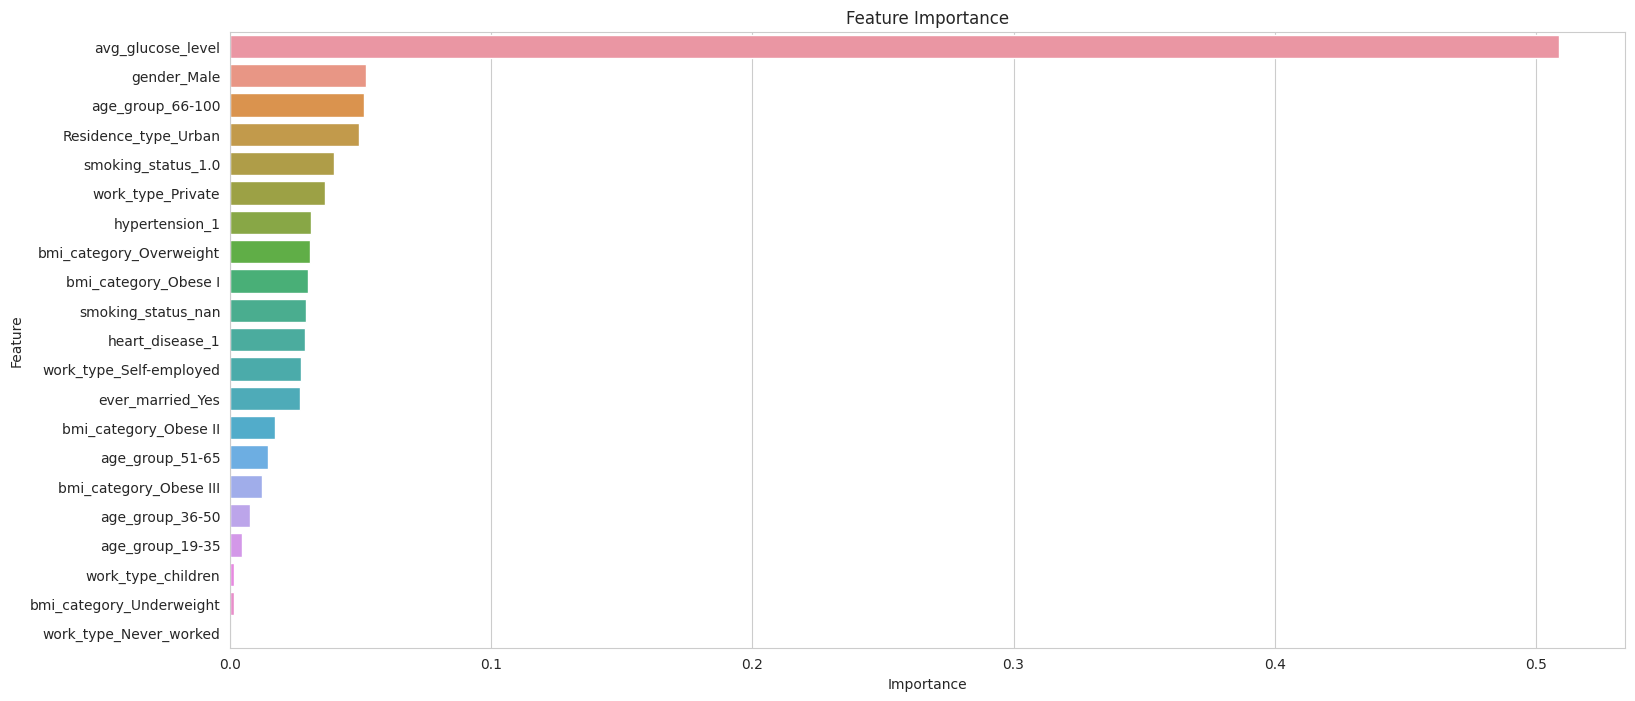

In [86]:
# Split the data into features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing pipeline
numeric_features = ['avg_glucose_level']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'bmi_category']

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit the preprocessing pipeline without the classifier
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Calculate feature importance using RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_preprocessed, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Get the names of categorical features after one-hot encoding
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': numeric_features + list(categorical_feature_names),
                                      'Importance': feature_importances})

# Plot feature importance
plt.figure(figsize=(18, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [87]:
# Split the data into features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
# Define preprocessing steps for numerical and categorical features
numeric_features = ['avg_glucose_level']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'bmi_category']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Model training
clf.fit(X_train, y_train)

# Model evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9324853228962818
Precision: 0.23076923076923078
Recall: 0.04838709677419355
F1 Score: 0.07999999999999999


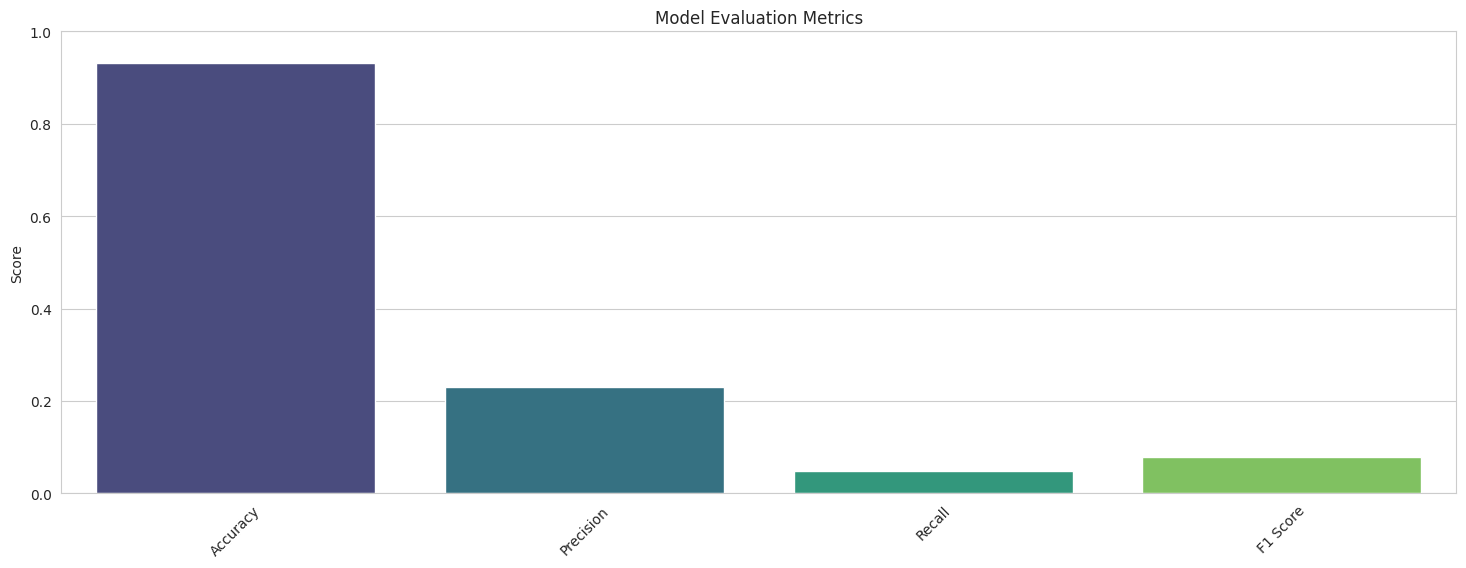

In [88]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(18, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]

    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    f1_score = round((2 * (recall*precision)/(recall+precision)),2)

    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1 Score   :', f1_score, '%')

In [90]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 1000, 5)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}
random_search_params

{'n_estimators': [200, 650, 1100, 1550, 2000],
 'max_depth': [10, 257, 505, 752, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8]}

In [97]:
import time

start_time = time.time()

rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=20,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1, #parallel processing
                                 scoring='f1',
                                 verbose=3)
rf_randomcv.fit(X_train_preprocessed, y_train)

end_time = time.time()
execution_time = end_time - start_time
print("Total execution time: {:.2f} seconds".format(execution_time))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Total execution time: 263.51 seconds


In [99]:
# Hyperparameters terbaik

rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 752}

In [101]:
# Estimator terbaik

rf_randomcv_best = rf_randomcv.best_estimator_

In [102]:
rf_randomcv_best

RandomForestClassifier(max_depth=752, n_estimators=2000)

[CV 3/5] END max_depth=257, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.000 total time=  13.5s
[CV 5/5] END max_depth=257, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.000 total time=  13.7s
[CV 4/5] END max_depth=505, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.000 total time=  18.9s
[CV 3/5] END max_depth=257, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.000 total time=  15.7s
[CV 2/5] END max_depth=505, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.000 total time=   9.6s
[CV 1/5] END max_depth=257, min_samples_leaf=6, min_samples_split=5, n_estimators=200;, score=0.000 total time=   1.7s
[CV 3/5] END max_depth=257, min_samples_leaf=6, min_samples_split=5, n_estimators=200;, score=0.000 total time=   1.6s
[CV 2/5] END max_depth=752, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.000 total time=   1.9s
[CV 1/5] END max_depth=752, min_samples_l

# Kesimpulan Dan Saran

### Kesimpulan:
- Dataset yang dianalisis terdiri dari berbagai fitur yang mencakup informasi tentang kesehatan dan gaya hidup individu, termasuk usia, jenis kelamin, status pernikahan, pekerjaan, status merokok, dan kondisi kesehatan seperti hipertensi, penyakit jantung, stroke, serta nilai rata-rata glukosa darah dan indeks massa tubuh (BMI).
- Terdapat beberapa nilai yang hilang dalam dataset, terutama pada fitur BMI.
- Mayoritas individu dalam dataset tidak memiliki riwayat stroke, tetapi masih ada sebagian kecil yang memiliki stroke.
- Distribusi stroke bervariasi di antara kategori BMI, dengan proporsi individu yang memiliki stroke cenderung meningkat seiring dengan peningkatan kategori BMI.
- Mayoritas individu tidak merokok, meskipun masih ada jumlah yang signifikan dari individu yang memiliki kebiasaan merokok saat ini atau pernah merokok sebelumnya.

### Saran :
1. **Feature Engineering**: Pertimbangkan lagi untuk melakukan feature engineering untuk menciptakan fitur tambahan yang mungkin meningkatkan performa model, misalnya, menggabungkan fitur atau membuat fitur turunan yang lebih informatif contohnya.
2. **Penyetelan Parameter Model**: Bisa melakukan penyetelan parameter model untuk mengoptimalkan kinerja model. Bisa menggunakan teknik seperti pencarian grid atau pencarian acak untuk menemukan kombinasi parameter yang optimal.
3. **Penggunaan Model Ensemble**: Pertimbangkan untuk menggunakan model ensemble, yang menggabungkan beberapa model untuk meningkatkan performa dan stabilitas prediksi.

### Saran dari Sisi Bisnis atau Kasus Dataset:
1. **Pencegahan Stroke**: Dari sudut pandang kesehatan, perusahaan atau lembaga kesehatan dapat menggunakan informasi dari model agar kita bisa mengidentifikasi orang - orang yang berisiko tinggi mengalami stroke dan memberikan intervensi atau perawatan yang sesuai untuk mencegahnya.
2. **Edukasi Masyarakat**: Dari sudut pandang pendidikan kesehatan masyarakat, informasi tentang faktor risiko stroke seperti BMI, kebiasaan merokok, dan kondisi kesehatan lainnya dapat kita gunakan agar bisa meningkatkan kesadaran dan edukasi bagi masyarakat tentang  betapa pentingnya gaya hidup sehat.
3. **Pengembangan Produk atau Layanan**: Informasi tentang perilaku dan kondisi kesehatan individu dalam dataset dapat digunakan untuk mengembangkan produk atau layanan baru yang bertujuan agar membantu individu memantau dan meningkatkan kesehatan mereka, seperti aplikasi kesehatan atau layanan konsultasi online.

